# Conditional Distribution of RSI
## The Distributions

For my neural network, I want to understand how the distribution of the RSI (for AMZN) changes after it gets above 70. This can be expressed as:

$$ P(X=x  \vert  x_{t-1} > 70) $$

Normally, a value above 76 is considered improbable with 97.5% probability since $ \mu \approx 52 $ and $ \sigma \approx 12 $. However, that is not nearly the case in the conditional distribution. It has a mean of 73, though a $\sigma$ of about 6.7, which does suggest that a sudden large increase in RSI far beyond its current value (suggestive of a large price increase), is not to probable, thus minimizing loss potential if trading on a mean reversion strategy like we are.

## Kullback-Leibler Divergence
Kullback-Leibler (KL) Divergence is a method for describing the difference between two Gaussian distributions, and can be found in the Scipy library as stats.entropy(pk, qk), where pk and qk are the two distributions being compared. It computes the logarithmic difference between the probability of any given value for each distribution multiplied by the probablity in the first distribution. So:

$$KL(P, Q) = \sum_{i}P(i) log \frac {P(i)}{Q(i)} $$

where $P$ and $Q$ are two distributions with equal area of their probability density functions.

The normalized statistic expresses the computed KL divergence as a percentage of a minimal KL divergence, which was designated, in Python code:

entropy(array[1:], array[:-1]

as the KL divergence of a distribution with itself is 0.

The result was about 6.4, meaning that the KL divergence of the two distributions is about 640% of that a a minimal instance. This leads to questions about further lags in time, as well as the inference that the LSTM network will have to learn to forget (i.e. assign minimal weight) to Lag 1 for RSI.


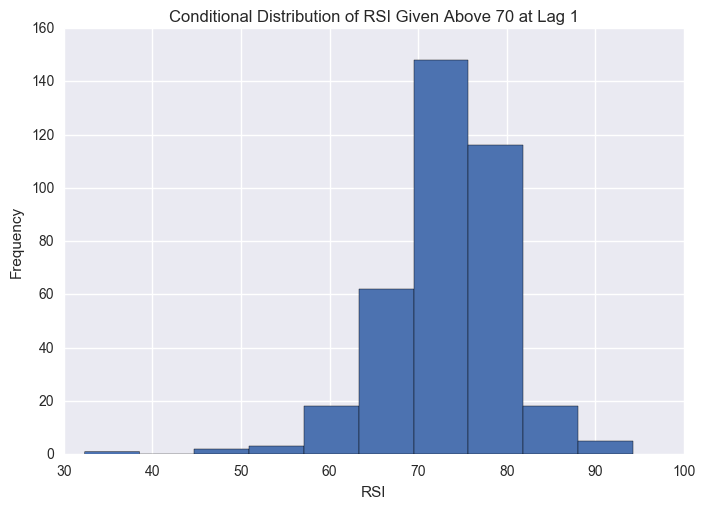

Mean of Conditional Distribution: 73.3079409591
Standard Deviation of Conditional Distribution: 6.66887790185

Kullback-Leibler (KL) Divergence of Conditional Distribution and Sample Distribution: 0.0341885414474
Normalized: 6.41363616096


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import quandl
import talib as T
import seaborn as sns
from scipy.stats import entropy
import random

amzn = quandl.get("WIKI/AMZN")
close = amzn.loc[:, "Close"].tolist()
close_np = np.array(close)
rsi = T.RSI(close_np)
rsi = rsi[14:]
rsi_list = [i for i in rsi]

cond_rsi = []

for i, n in enumerate(rsi_list):
    if n > 70:
        cond_rsi.append(rsi_list[i+1])
else:
    cond_rsi = np.array(cond_rsi)

plt.hist(cond_rsi)
plt.title("Conditional Distribution of RSI Given Above 70 at Lag 1")
plt.xlabel("RSI")
plt.ylabel("Frequency")
plt.show()


sample_rsi = np.array(random.sample(rsi_list, 373))

kl = entropy(pk=cond_rsi, qk=sample_rsi)
perfect = entropy(pk=cond_rsi[1:], qk=cond_rsi[:-1])
normal = kl / perfect

print("Mean of Conditional Distribution: " + str(np.nanmean(cond_rsi)))
print("Standard Deviation of Conditional Distribution: " + str(np.nanstd(cond_rsi)))
print()
print("Kullback-Leibler (KL) Divergence of Conditional Distribution and Sample Distribution: " + str(kl))
print("Normalized: " + str(normal))
